In [3]:
# Import our dependencies
import pandas as pd
import sklearn as skl
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf

C:\Users\914bo\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\914bo\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\914bo\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\914bo\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\f

In [4]:
# Read in Housing data
df = pd.read_csv(Path('./Resources/house2datav2.csv'))
df.head()

,price,address,zip,date,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150000,"4105 Fort Hamilton Pkwy, Brooklyn, NY 11219",11219,8/30/20,0,1.0,"1,060",Kings County (Brooklyn),1149461,48699,188640,1067440
1,5850,"3272 Steinway St, Long Island City, NY 11103",11103,8/31/20,0,1.0,"1,070",Queens County,1099996,39401,166650,1015040
2,699000,"3014 Gunther Ave, Bronx, NY 10469",10469,9/1/20,0,1.0,"1,800",Bronx County,565642,32035,44610,621050
3,22000000,"178 Prince St, New York, NY 10012",10012,9/2/20,0,1.0,"11,165",New York County,879665,31973,300250,594060
4,115000,"424 E 115th St #2A, New York, NY 10029",10029,9/3/20,0,1.0,120,New York County,879665,31973,300250,594060


In [5]:
# Print out the boro value counts
boro_counts = df.boro.value_counts()
boro_counts

New York County                    171
Kings County (Brooklyn)            160
Queens County                      151
Richmond County (Staten Island)    124
Bronx County                        81
Name: boro, dtype: int64

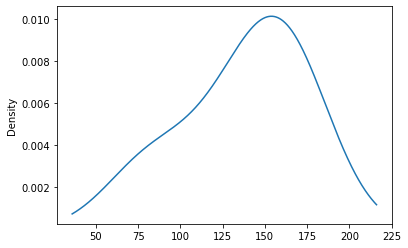

In [6]:
# Visualize the value counts
boro_counts.plot.density()


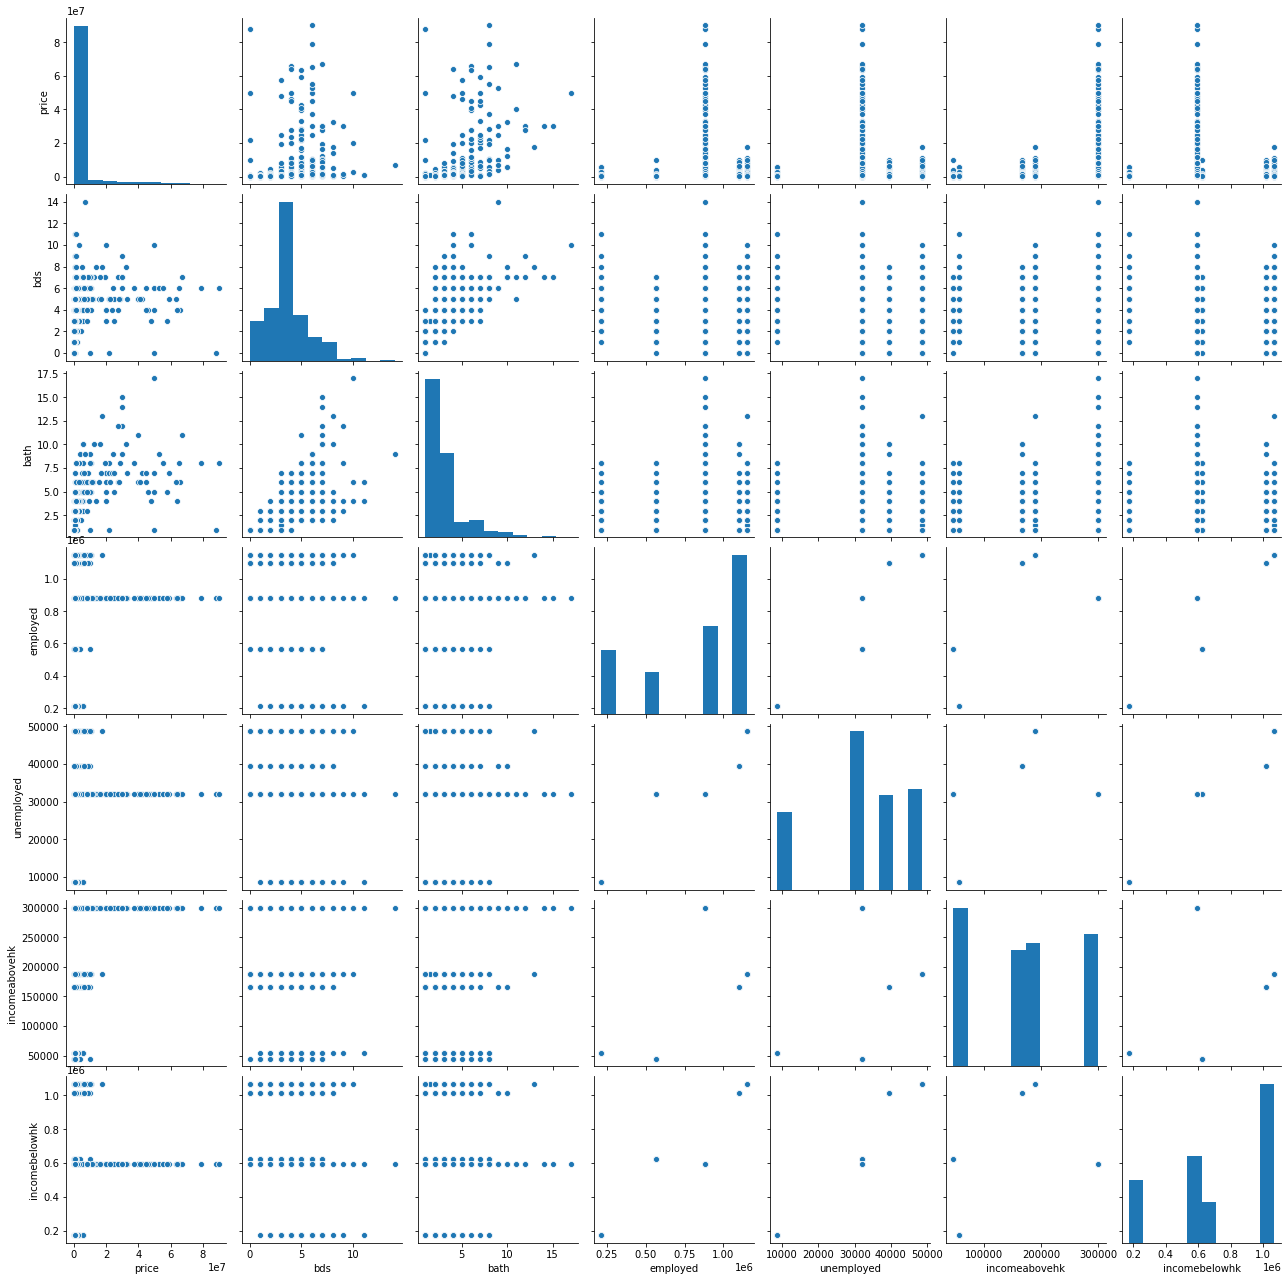

In [7]:
sns.pairplot(df.drop(['zip'], axis=1))


In [8]:
new_df = df.drop(['address', 'date'], axis=1)
new_df.head()


,price,zip,bds,bath,sqft,boro,employed,unemployed,incomeabovehk,incomebelowhk
0,150000,11219,0,1.0,"1,060",Kings County (Brooklyn),1149461,48699,188640,1067440
1,5850,11103,0,1.0,"1,070",Queens County,1099996,39401,166650,1015040
2,699000,10469,0,1.0,"1,800",Bronx County,565642,32035,44610,621050
3,22000000,10012,0,1.0,"11,165",New York County,879665,31973,300250,594060
4,115000,10029,0,1.0,120,New York County,879665,31973,300250,594060


In [9]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop ="first")


In [10]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new_df.boro.values.reshape(-1,1)))

In [11]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['boro'])
encode_df.head()

,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island)
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [12]:
# Merge the two DataFrames together and drop the boro column
new2_df=new_df.merge(encode_df,left_index=True,right_index=True).drop("boro",1)
new2_df.head()

,price,zip,bds,bath,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island)
0,150000,11219,0,1.0,"1,060",1149461,48699,188640,1067440,1.0,0.0,0.0,0.0
1,5850,11103,0,1.0,"1,070",1099996,39401,166650,1015040,0.0,0.0,1.0,0.0
2,699000,10469,0,1.0,"1,800",565642,32035,44610,621050,0.0,0.0,0.0,0.0
3,22000000,10012,0,1.0,"11,165",879665,31973,300250,594060,0.0,1.0,0.0,0.0
4,115000,10029,0,1.0,120,879665,31973,300250,594060,0.0,1.0,0.0,0.0


In [13]:
#Find null Values

for column in new2_df.columns:
    print(f"Column {column} has {new2_df[column].isnull().sum()} null values")

Column price has 0 null values
Column zip has 0 null values
Column bds has 0 null values
Column bath has 0 null values
Column sqft has 0 null values
Column employed has 0 null values
Column unemployed has 0 null values
Column incomeabovehk has 0 null values
Column incomebelowhk has 0 null values
Column boro_Kings County (Brooklyn) has 0 null values
Column boro_New York County has 0 null values
Column boro_Queens County has 0 null values
Column boro_Richmond County (Staten Island) has 0 null values


In [14]:
# List dataframe data types
new2_df.dtypes


price                                     int64
zip                                       int64
bds                                       int64
bath                                    float64
sqft                                     object
employed                                  int64
unemployed                                int64
incomeabovehk                             int64
incomebelowhk                             int64
boro_Kings County (Brooklyn)            float64
boro_New York County                    float64
boro_Queens County                      float64
boro_Richmond County (Staten Island)    float64
dtype: object

In [15]:
new2_df['sqft']=new2_df['sqft'].str.replace(',','')
new2_df.head()

,price,zip,bds,bath,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island)
0,150000,11219,0,1.0,1060,1149461,48699,188640,1067440,1.0,0.0,0.0,0.0
1,5850,11103,0,1.0,1070,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0
2,699000,10469,0,1.0,1800,565642,32035,44610,621050,0.0,0.0,0.0,0.0
3,22000000,10012,0,1.0,11165,879665,31973,300250,594060,0.0,1.0,0.0,0.0
4,115000,10029,0,1.0,120,879665,31973,300250,594060,0.0,1.0,0.0,0.0


In [16]:
new2_df.astype({'sqft': 'int64'}).dtypes

price                                     int64
zip                                       int64
bds                                       int64
bath                                    float64
sqft                                      int64
employed                                  int64
unemployed                                int64
incomeabovehk                             int64
incomebelowhk                             int64
boro_Kings County (Brooklyn)            float64
boro_New York County                    float64
boro_Queens County                      float64
boro_Richmond County (Staten Island)    float64
dtype: object

In [17]:
new2_df['zip']=new2_df['zip'].astype('str')
new2_df.head()

,price,zip,bds,bath,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island)
0,150000,11219,0,1.0,1060,1149461,48699,188640,1067440,1.0,0.0,0.0,0.0
1,5850,11103,0,1.0,1070,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0
2,699000,10469,0,1.0,1800,565642,32035,44610,621050,0.0,0.0,0.0,0.0
3,22000000,10012,0,1.0,11165,879665,31973,300250,594060,0.0,1.0,0.0,0.0
4,115000,10029,0,1.0,120,879665,31973,300250,594060,0.0,1.0,0.0,0.0


In [18]:
new2_df.dtypes

price                                     int64
zip                                      object
bds                                       int64
bath                                    float64
sqft                                     object
employed                                  int64
unemployed                                int64
incomeabovehk                             int64
incomebelowhk                             int64
boro_Kings County (Brooklyn)            float64
boro_New York County                    float64
boro_Queens County                      float64
boro_Richmond County (Staten Island)    float64
dtype: object

In [19]:
# Print out the Zip value counts
zip_counts = df.zip.value_counts()
zip_counts

10312    21
10314    20
10019    20
11201    17
11234    16
         ..
11436     1
11426     1
11419     1
11415     1
10027     1
Name: zip, Length: 146, dtype: int64

In [20]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop ="first")

In [21]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new_df.zip.values.reshape(-1,1)))

In [22]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['zip'])
encode_df.head()

,zip_10002,zip_10003,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,zip_10013,zip_10014,...,zip_11427,zip_11429,zip_11432,zip_11433,zip_11434,zip_11435,zip_11436,zip_11692,zip_11693,zip_11694
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Merge the two DataFrames together and drop the boro column
new3_df=new2_df.merge(encode_df,left_index=True,right_index=True).drop("zip",1)
new3_df.head()

,price,bds,bath,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Kings County (Brooklyn),boro_New York County,...,zip_11427,zip_11429,zip_11432,zip_11433,zip_11434,zip_11435,zip_11436,zip_11692,zip_11693,zip_11694
0,150000,0,1.0,1060,1149461,48699,188640,1067440,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5850,0,1.0,1070,1099996,39401,166650,1015040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,699000,0,1.0,1800,565642,32035,44610,621050,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22000000,0,1.0,11165,879665,31973,300250,594060,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,115000,0,1.0,120,879665,31973,300250,594060,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
new3_df.columns

Index(['price', 'bds', 'bath', 'sqft', 'employed', 'unemployed',
       'incomeabovehk', 'incomebelowhk', 'boro_Kings County (Brooklyn)',
       'boro_New York County',
       ...
       'zip_11427', 'zip_11429', 'zip_11432', 'zip_11433', 'zip_11434',
       'zip_11435', 'zip_11436', 'zip_11692', 'zip_11693', 'zip_11694'],
      dtype='object', length=157)

In [34]:
new3_df.dtypes

price          int64
bds            int64
bath         float64
sqft          object
employed       int64
              ...   
zip_11435    float64
zip_11436    float64
zip_11692    float64
zip_11693    float64
zip_11694    float64
Length: 157, dtype: object

In [35]:
new3_df.astype({'sqft': 'int64'}).dtypes

price          int64
bds            int64
bath         float64
sqft           int64
employed       int64
              ...   
zip_11435    float64
zip_11436    float64
zip_11692    float64
zip_11693    float64
zip_11694    float64
Length: 157, dtype: object

In [41]:
# Print out the bath value counts
bath_counts = df.bath.value_counts()
bath_counts

2.0     225
1.0     151
3.0     139
4.0      61
5.0      37
6.0      24
7.0      16
8.0      14
9.0       6
10.0      5
11.0      2
12.0      2
13.0      1
17.0      1
15.0      1
14.0      1
1.5       1
Name: bath, dtype: int64

In [36]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop ="first")

In [37]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new_df.bath.values.reshape(-1,1)))

In [38]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['bath'])
encode_df.head()

,bath_1.5,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,bath_7.0,bath_8.0,bath_9.0,bath_10.0,bath_11.0,bath_12.0,bath_13.0,bath_14.0,bath_15.0,bath_17.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Merge the two DataFrames together and drop the boro column
new4_df=new3_df.merge(encode_df,left_index=True,right_index=True).drop("bath",1)
new4_df.head()

,price,bds,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,...,bath_7.0,bath_8.0,bath_9.0,bath_10.0,bath_11.0,bath_12.0,bath_13.0,bath_14.0,bath_15.0,bath_17.0
0,150000,0,1060,1149461,48699,188640,1067440,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5850,0,1070,1099996,39401,166650,1015040,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,699000,0,1800,565642,32035,44610,621050,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22000000,0,11165,879665,31973,300250,594060,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,115000,0,120,879665,31973,300250,594060,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
new4_df.columns

Index(['price', 'bds', 'sqft', 'employed', 'unemployed', 'incomeabovehk',
       'incomebelowhk', 'boro_Kings County (Brooklyn)', 'boro_New York County',
       'boro_Queens County',
       ...
       'bath_7.0', 'bath_8.0', 'bath_9.0', 'bath_10.0', 'bath_11.0',
       'bath_12.0', 'bath_13.0', 'bath_14.0', 'bath_15.0', 'bath_17.0'],
      dtype='object', length=172)

In [42]:
# Print out the bed value counts
bds_counts = df.bds.value_counts()
bds_counts

3     219
2     105
4      97
5      91
1      55
6      48
7      29
0      25
8       8
9       4
10      3
11      2
14      1
Name: bds, dtype: int64

In [43]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop ="first")

In [45]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new_df.bds.values.reshape(-1,1)))

In [46]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['bds'])
encode_df.head()

,bds_1,bds_2,bds_3,bds_4,bds_5,bds_6,bds_7,bds_8,bds_9,bds_10,bds_11,bds_14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Merge the two DataFrames together and drop the boro column
new5_df=new4_df.merge(encode_df,left_index=True,right_index=True).drop("bds",1)
new5_df.head()

,price,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island),...,bds_3,bds_4,bds_5,bds_6,bds_7,bds_8,bds_9,bds_10,bds_11,bds_14
0,150000,1060,1149461,48699,188640,1067440,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5850,1070,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,699000,1800,565642,32035,44610,621050,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22000000,11165,879665,31973,300250,594060,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,115000,120,879665,31973,300250,594060,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
new5_df.columns

Index(['price', 'sqft', 'employed', 'unemployed', 'incomeabovehk',
       'incomebelowhk', 'boro_Kings County (Brooklyn)', 'boro_New York County',
       'boro_Queens County', 'boro_Richmond County (Staten Island)',
       ...
       'bds_3', 'bds_4', 'bds_5', 'bds_6', 'bds_7', 'bds_8', 'bds_9', 'bds_10',
       'bds_11', 'bds_14'],
      dtype='object', length=183)

In [49]:
# List dataframe data types
new5_df.dtypes

price              int64
sqft              object
employed           int64
unemployed         int64
incomeabovehk      int64
                  ...   
bds_8            float64
bds_9            float64
bds_10           float64
bds_11           float64
bds_14           float64
Length: 183, dtype: object

In [50]:
new5_df.astype({'sqft': 'int64'}).dtypes

price              int64
sqft               int64
employed           int64
unemployed         int64
incomeabovehk      int64
                  ...   
bds_8            float64
bds_9            float64
bds_10           float64
bds_11           float64
bds_14           float64
Length: 183, dtype: object

In [56]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [57]:
# Fit the StandardScaler
scaler.fit(new5_df)

StandardScaler()

In [58]:
# Scale the data
scaled_data = scaler.transform(new5_df)

In [59]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns= new5_df.columns)
transformed_scaled_data.head()

,price,sqft,employed,unemployed,incomeabovehk,incomebelowhk,boro_Kings County (Brooklyn),boro_New York County,boro_Queens County,boro_Richmond County (Staten Island),...,bds_3,bds_4,bds_5,bds_6,bds_7,bds_8,bds_9,bds_10,bds_11,bds_14
0,-0.346590,-0.234747,0.922409,1.167422,0.196122,1.053305,1.814869,-0.575669,-0.530770,-0.469307,...,-0.684068,-0.405471,-0.390749,-0.274075,-0.209936,-0.108545,-0.076528,-0.066227,-0.054034,-0.03818
1,-0.359153,-0.234406,0.777908,0.463122,-0.041845,0.892552,-0.551004,-0.575669,1.884056,-0.469307,...,-0.684068,-0.405471,-0.390749,-0.274075,-0.209936,-0.108545,-0.076528,-0.066227,-0.054034,-0.03818
2,-0.298740,-0.209492,-0.783090,-0.094834,-1.362512,-0.316135,-0.551004,-0.575669,-0.530770,-0.469307,...,-0.684068,-0.405471,-0.390749,-0.274075,-0.209936,-0.108545,-0.076528,-0.066227,-0.054034,-0.03818
3,1.557818,0.110133,0.134260,-0.099530,1.403920,-0.398935,-0.551004,1.737108,-0.530770,-0.469307,...,-0.684068,-0.405471,-0.390749,-0.274075,-0.209936,-0.108545,-0.076528,-0.066227,-0.054034,-0.03818
4,-0.349640,-0.266829,0.134260,-0.099530,1.403920,-0.398935,-0.551004,1.737108,-0.530770,-0.469307,...,-0.684068,-0.405471,-0.390749,-0.274075,-0.209936,-0.108545,-0.076528,-0.066227,-0.054034,-0.03818


In [60]:
# Split our preprocessed data into our features and target arrays
y = new3_df["price"].values
X = new3_df.drop(["price"],1).values

In [61]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [62]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train and Evaluate Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

In [64]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [65]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [66]:
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Housing price predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Housing price predictive accuracy: 0.012


# Train and Evaluate Deep Learning Model

In [67]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
515/515 [==============================] - 0s 538us/sample - loss: 1804003.7049 - acc: 0.0000e+00
Epoch 2/50
515/515 [==============================] - 0s 184us/sample - loss: -578838.8959 - acc: 0.0000e+00
Epoch 3/50
515/515 [==============================] - 0s 190us/sample - loss: -2386104.5559 - acc: 0.0000e+00
Epoch 4/50
515/515 [==============================] - 0s 166us/sample - loss: -4550772.3987 - acc: 0.0000e+00
Epoch 5/50
515/515 [==============================] - 0s 177us/sample - loss: -7208031.9805 - acc: 0.0000e+00
Epoch 6/50
515/515 [==============================] - 0s 190us/sample - loss: -10645803.8998 - acc: 0.0000e+00
Epoch 7/50
515/515 [==============================] - 0s 164us/sample - loss: -15689755.5621 - acc: 0.0000e+00
Epoch 8/50
515/515